In [103]:
# importation des librairies

import numpy as np
import matplotlib.pyplot as plt


In [104]:
# codes pour marche aléatoire 1D

def marche_aléatoire(p,N):  # avec 0<p<1 et N entier naturel
   
    U = np.random.random(N)  # ici on fait avec une uniforme continue qui renvoie des valeurs entre 0 et 1 
    B = (U <= p).astype(int)   # en comparant une uniforme continue Y de [0,1] à une proba 'p' cela revient à simuler une Bernoulli X de paramètre 'p' (car P(Y=<p) = p = P(X=1))
    d = np.cumsum(B)[N-1]
    g = N - d
    position = d - g
    
    return (position)

def marche_aléatoire_MC(p,N,M):  # avec 0<p<1 et N entier naturel
   
   m = 0
   s = 0
   A = []   # liste où on va sauvegarder les valeurs des M marches aléatoires
   for i in range(M):
     A.append(marche_aléatoire(p,N))
   
   for i in range(M):
     m = m + A[i]
   mean = m/M   # moyenne
   
   for i in range(M):
     s  = s + (A[i] - mean)**2
   std = np.sqrt(s/M)   # ecart-type

   return(np.array([mean,std]))


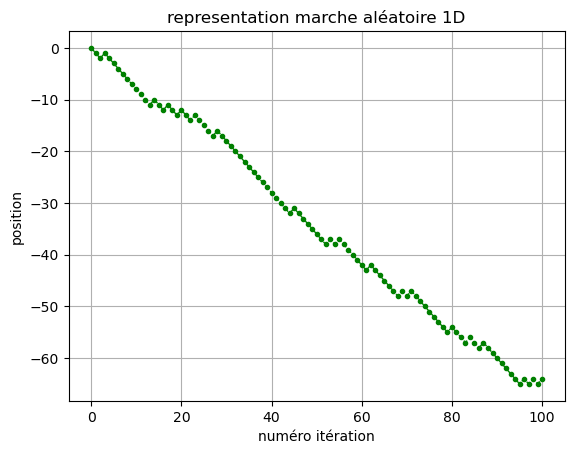

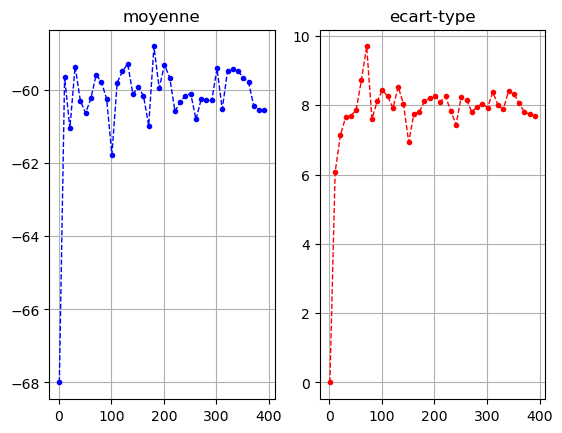

In [105]:
# Exercice 1

def exo1(p,N,M):
    x = 0
    X = [x]
    n = [0]

    Mean = []
    std = []
    k = []

    for i in range(1,N+1):  # pour la position
        x += marche_aléatoire(p,1)
        X.append(x)
        n.append(i)

    for i in range(1, M+1, 10): # pour moyenne et ecart-type
        MC = marche_aléatoire_MC(p,N,i)
        Mean.append(MC[0])
        std.append(MC[1])
        k.append(i)


    plt.figure()    # début du "bloc de code" pour construire la figure "representation marche aléatoire 1D"
    plt.plot(n, X,'g.--', lw = 1)
    plt.xlabel('numéro itération')
    plt.ylabel('position')
    plt.title('representation marche aléatoire 1D')
    plt.grid()      # pour mettre une grille de graduation
    
    plt.show()      # fin du "bloc de code" pour construire la figure "representation marche aléatoire 1D"


    fig = plt.figure()    # début du "bloc de code" pour construire la figure "moyenne & écart-type"

    axe1 = fig.add_subplot(121)      # graphique 1 de notre figure (# correspondant à la moyenne)
    axe1.plot(k, Mean, 'b.--', lw = 1)
    axe1.set_title('moyenne')
    axe1.grid()

    axe2 = fig.add_subplot(122)      # graphique 2 de notre figure (# correspondant à l'ecart-type)
    axe2.plot(k, std, 'r.--', lw = 1)
    axe2.set_title('ecart-type')
    axe2.grid()

    plt.show()      # fin du "bloc de code" pour construire la figure "moyenne & écart-type"

exo1(0.2,100,400)

In [ ]:
# Exercice 2 

def exo2(p,N):
    x = 0
    y = 0
    X = [0]
    Y = [0]
    

    for i in range(N):
        U = np.random.random(1)  
        B = (U <= p).astype(int)
        first = np.cumsum(B)[0] 

        if first == 1 : # on a une proba 'p' de se déplacer à l'horizontale 
            U1 = np.random.random(1)  
            B1 = (U1 <= 0.5).astype(int)
            left = np.cumsum(B1)[0] 

            if left == 1 : # ensuite, proba de 0.5 de se déplacer à gauche
                x += -1 
            
            else :      # ensuite, proba de 0.5 de se déplacer à droite
                x += 1
            
        else :  # on a une proba '1-p' de se déplacer à la verticale 
            U2 = np.random.random(1)  
            B2 = (U2 <= 0.5).astype(int)
            down = np.cumsum(B2)[0]

            if down == 1: # ensuite, proba de 0.5 de se déplacer en bas
                y += -1
            
            else: 
                y += 1  # ensuite, proba de 
        
        X.append(x)
        Y.append(y)



            
